# Food Delivery Cost and Profitability Analysis

In [1]:
import pandas as pd

In [2]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23

In [3]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                1000 non-null   int64  
 1   Customer ID             1000 non-null   object 
 2   Restaurant ID           1000 non-null   object 
 3   Order Date and Time     1000 non-null   object 
 4   Delivery Date and Time  1000 non-null   object 
 5   Order Value             1000 non-null   int64  
 6   Delivery Fee            1000 non-null   int64  
 7   Payment Method          1000 non-null   object 
 8   Discounts and Offers    1000 non-null   object 
 9   Commission Fee          1000 non-null   int64  
 10  Payment Processing Fee  1000 non-null   int64  
 11  Refunds/Chargebacks     1000 non-null   int64  
 12  Discount Percentage     1000 non-null   float64
 13  Discount Amount         1000 non-null   float64
 14  Total Costs             1000 non-null   f

In [4]:
from datetime import datetime

# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return (float(discount_str.split('%')[0]))/100
    else:
        # No discount
        return 0.0
                                                       

In [5]:
# apply the function to create a new 'Discount Value' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [6]:
food_orders['Discount Percentage']

0       0.05
1       0.10
2       0.15
3       0.00
4      50.00
       ...  
995     0.05
996     0.00
997     0.00
998     0.15
999     0.15
Name: Discount Percentage, Length: 1000, dtype: float64

In [7]:
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value']* x['Discount Percentage']/100) 
                                                   if x['Discount Percentage']>1
                                                   else x['Discount Percentage'], axis= 1)

In [8]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0.05,0.05,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0.10,0.10,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0.15,0.15,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.00,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.00,996.00,2022.00,130,-1892.00


In [9]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Discount Percentage     1000 non-null   float64  

In [10]:
def disamt(x,y):
    if x<1:
        return x*y
    else:
        return y-x

In [11]:
food_orders['Discount Amount'] = food_orders[['Discount Percentage','Order Value']].apply(lambda x:disamt(x['Discount Percentage'],x['Order Value']),axis=1)

In [12]:
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                 0.05            95.70
1          986                  10%                 0.10            98.60
2          937         15% New User                 0.15           140.55
3         1463                 None                 0.00             0.00
4         1992         50 off Promo                50.00          1942.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

# Cost and Profitability Analysis

In [13]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']

In [14]:
food_orders['Revenue'] = food_orders['Commission Fee']

In [15]:
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

In [16]:
# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

In [17]:
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

In [18]:
print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 332677.85, 'Total Profit': -205687.85}


# Matplotlib

In [19]:
import matplotlib.pyplot as plt

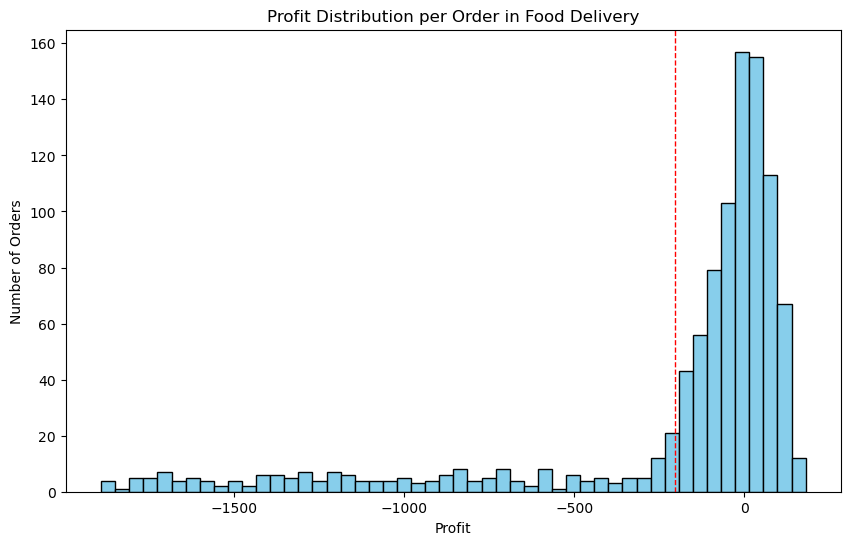

In [20]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

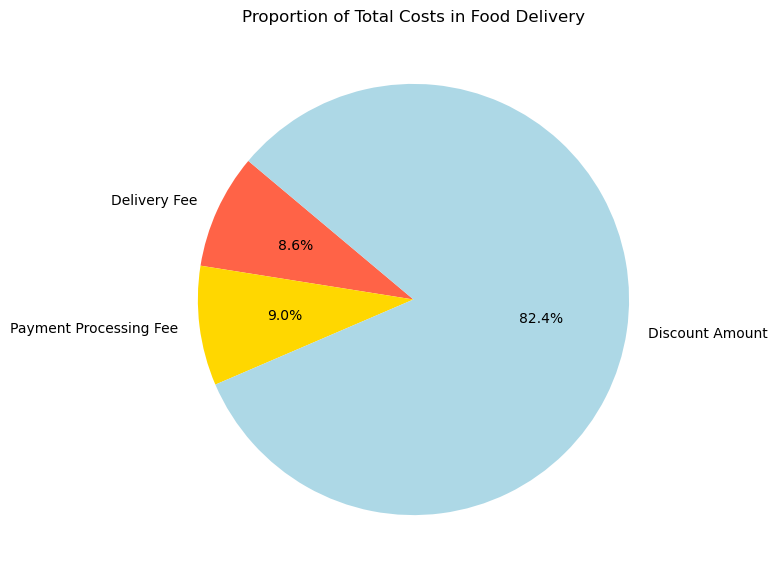

In [21]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

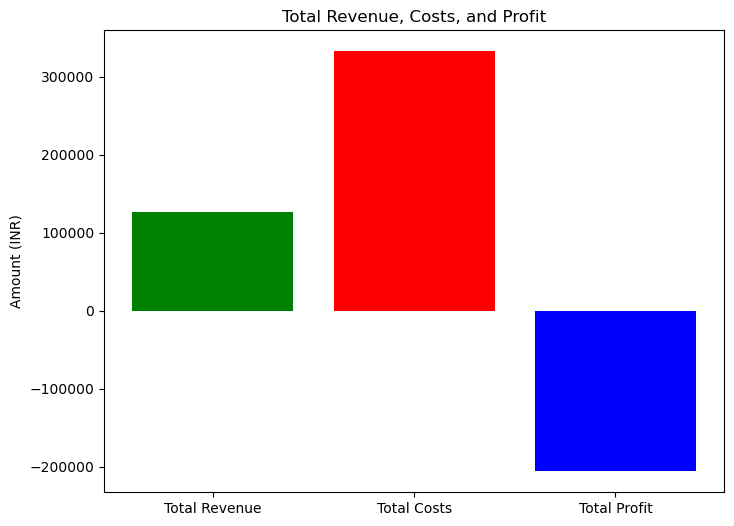

In [22]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

# A New Strategy for Profits

In [23]:
# Filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0]

In [26]:
# Calculate the average comission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/ profitable_orders['Order Value'])*100

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7856\3784208417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/ profitable_orders['Order Value'])*100


In [27]:
# Calculate the average discount percentage for profitable orders 
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount']/ profitable_orders['Order Value']) * 100

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7856\3262279555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount']/ profitable_orders['Order Value']) * 100


In [28]:
# Calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

In [29]:
print(new_avg_commission_percentage, new_avg_discount_percentage)

29.95869671103175 5.522224394111254


In [32]:
# Simulate profitablity with recommended discounts and commissions 
recommended_commission_percentage = 29.95 #30%
recommended_discount_percentage = 5.52 #6%

In [33]:
# Calculate the simulate commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

In [35]:
# Recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee']+
                                        food_orders['Payment Processing Fee']+
                                        food_orders['Simulated Discount Amount'])

In [37]:
food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee']-
                                   food_orders['Simulated Total Costs'])

In [38]:
# Visualizing the comparison
import seaborn as sns

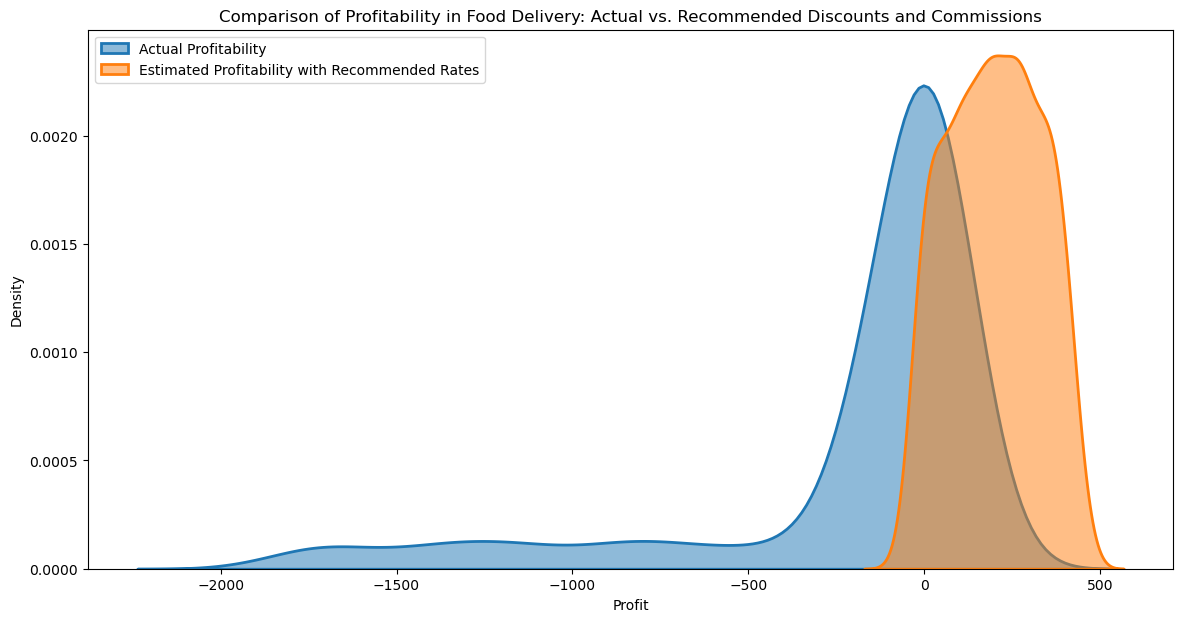

In [41]:
plt.figure(figsize=(14,7))

# Actaul Profitabilty
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# Simulated Profitabilty
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()